In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser


In [2]:
#Setup proejct
from Utils.ProjectPathsSetup import ProjectPathsSetup
from Utils.Concatenator import Cocatenator
from Environment.PathsParameters import *
from Environment.Parameters import *
ProjectPathsSetup().add_project_paths('./')

## PreTratamento nos dados

Merge e shuffle de todos os bancos de dados

In [3]:
#load Data

fake_news_df = pd.read_csv(FAKE_NEWS_DATASET)
fake_news_df['label'] = 1
true_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df['label'] = 0


### Pré Avaliação Datasets

In [4]:
fake_news_df['date'] = pd.to_datetime(fake_news_df['date'], errors='coerce')
fake_news_df = fake_news_df.dropna(subset=['date'])

In [5]:
fake_news_df['date'] = pd.to_datetime(fake_news_df['date'].values)
fake_news_df['month'] = fake_news_df['date'].apply(lambda x: x.month)
fake_news_df['year'] = fake_news_df['date'].apply(lambda x: x.year)

In [6]:
fake_news_df['date']

0       2017-12-31
1       2017-12-31
2       2017-12-30
3       2017-12-29
4       2017-12-25
           ...    
23476   2016-01-16
23477   2016-01-16
23478   2016-01-15
23479   2016-01-14
23480   2016-01-12
Name: date, Length: 23471, dtype: datetime64[ns]

In [7]:
news_df  = Cocatenator().concatenate(fake_news_df, true_news_df)

<Axes: xlabel='year,month'>

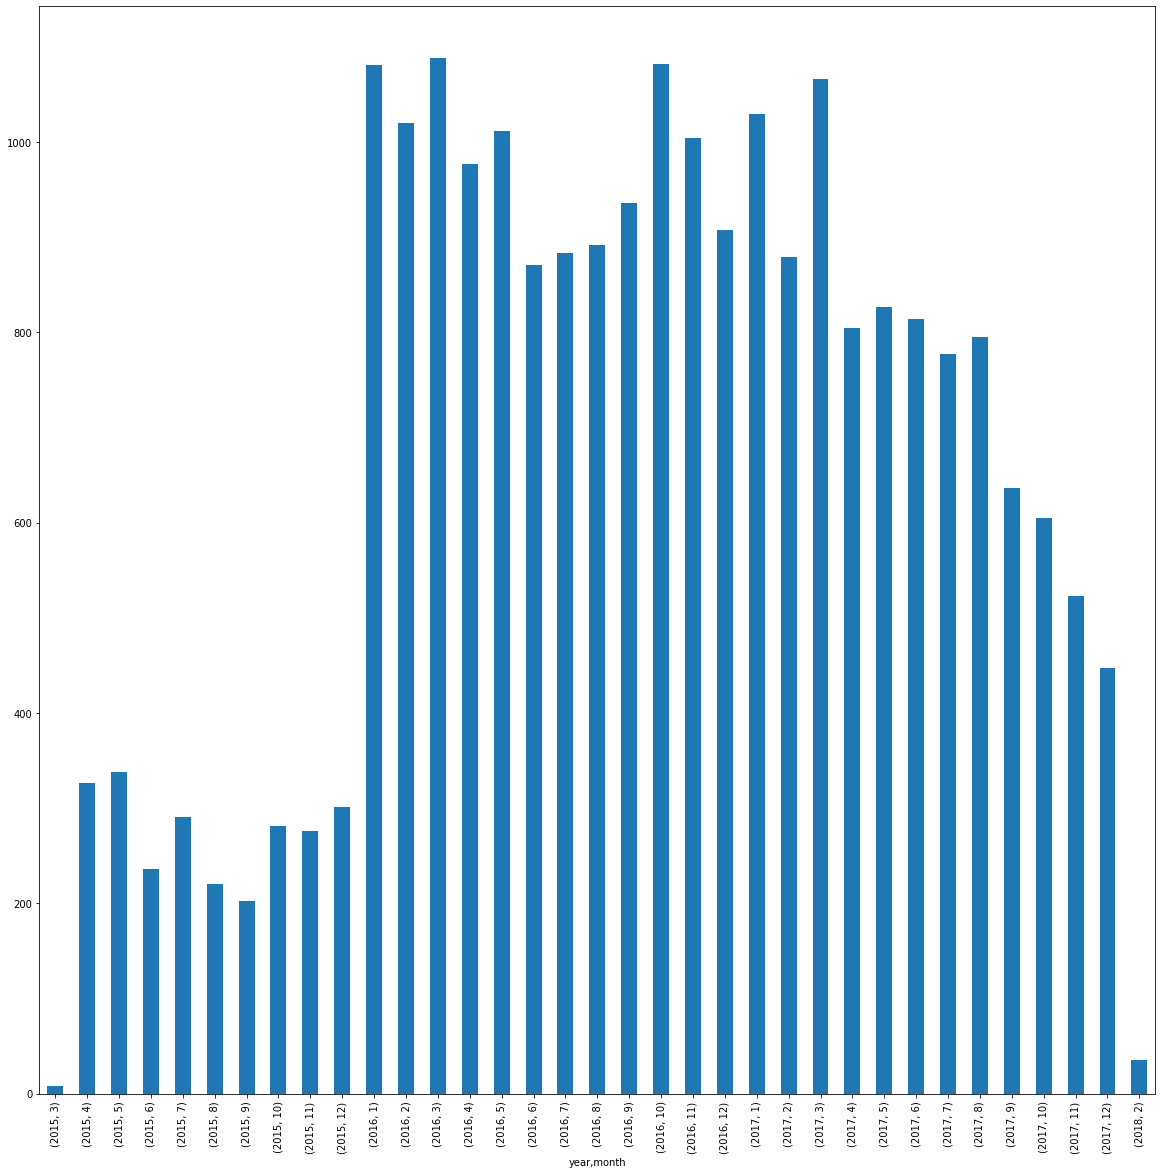

In [8]:
fig = plt.figure(figsize=(20,20))
fig.set_facecolor('white')
fake_news_df.groupby(by=['year', 'month'], axis=0).count()['title'].plot(kind='bar')


### Fake News

Text(0.5, 1.0, 'Fake news distribution per Subject')

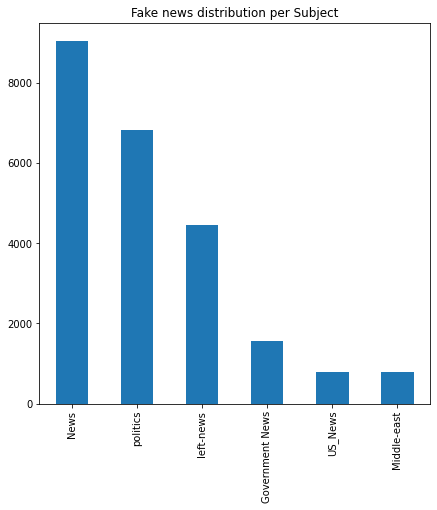

In [9]:
fig = plt.figure(figsize=(7,7))
fake_news_df['subject'].value_counts().plot(kind='bar')
plt.title('Fake news distribution per Subject')

#### True news

In [10]:
true_news_df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


Text(0.5, 1.0, 'True news distribution per Subject')

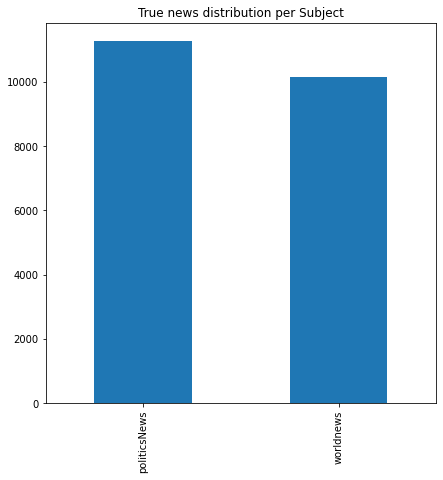

In [11]:
fig = plt.figure(figsize=(7,7))
true_news_df['subject'].value_counts().plot(kind='bar')
plt.title('True news distribution per Subject')

Comparando a distribuição de assunto entre as fakenews com as True news percebe-se que as fakenews são focadas em dois principais assutos equanto as notícias verdadeira são mais diversas. Será então que se queremos construir um bom detector de fake news não deveriamos então focar nesses dois assuntos? Ou então o assunto não seria relevante?

Vamos considerar só relevante o titulo e o texto relativo as noticias

In [12]:
true_news_df['date'] = pd.to_datetime(true_news_df['date'])
true_news_df['month'] = true_news_df['date'].apply(lambda x: x.month)
true_news_df['year'] = true_news_df['date'].apply(lambda x: x.year)

<Axes: xlabel='year,month'>

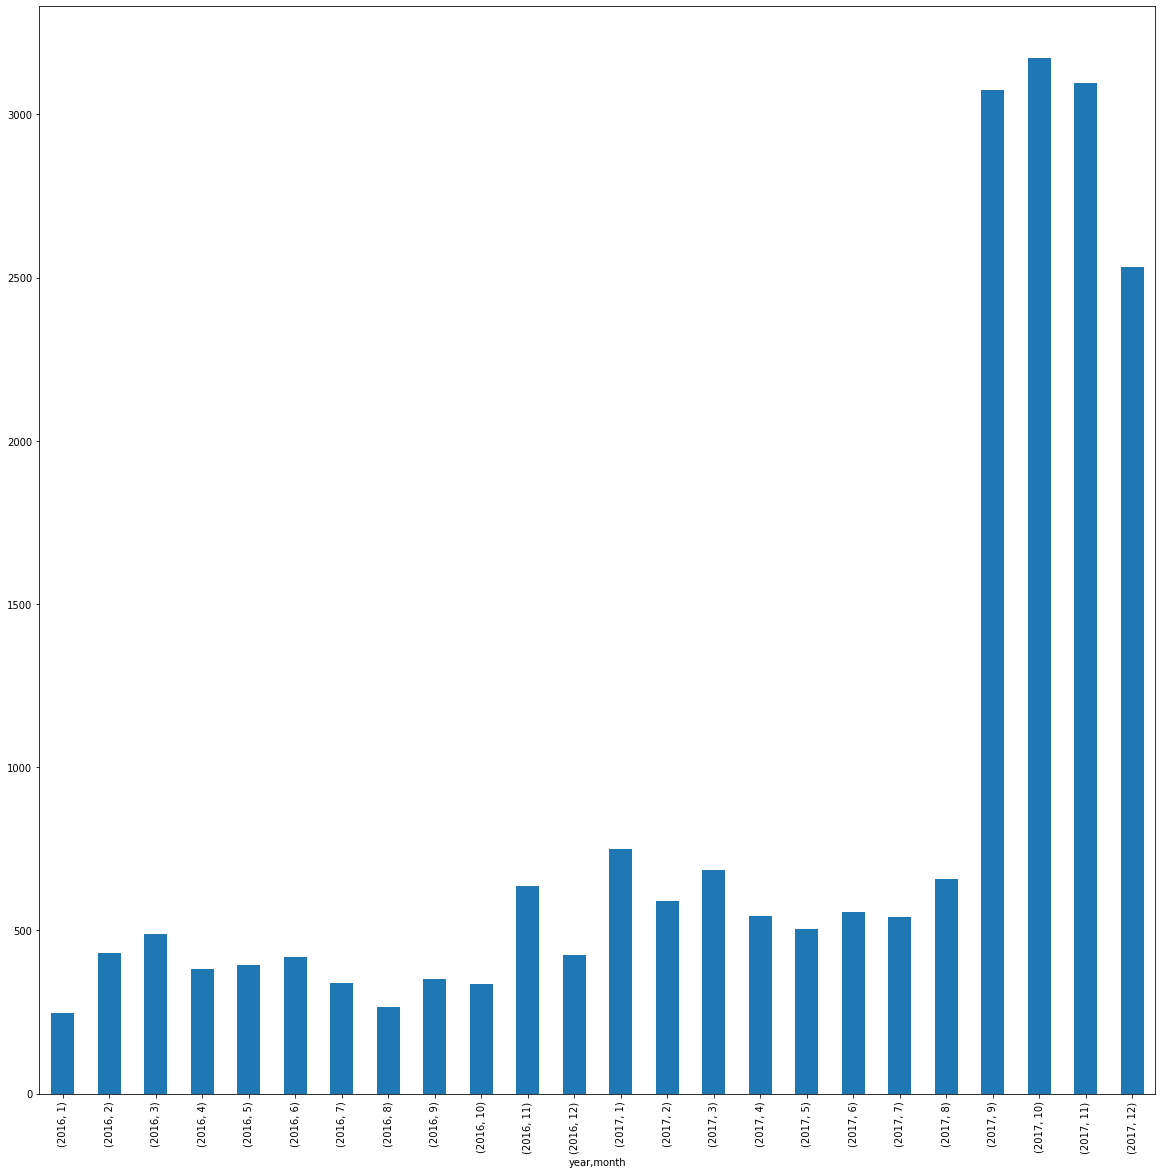

In [13]:
fig = plt.figure(figsize=(20,20))
fig.set_facecolor('white')
true_news_df.groupby(by=['year', 'month'], axis=0).count()['title'].plot(kind='bar')

#### Jutando os dados 

In [14]:
from Utils.Concatenator import Cocatenator

In [65]:
fake_news_df = pd.read_csv(FAKE_NEWS_DATASET)
fake_news_df['date'] = pd.to_datetime(fake_news_df['date'], errors='coerce')
fake_news_df = fake_news_df.dropna(subset=['date'])
fake_news_df['label'] = 1

true_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df['label'] = 0

news_df = Cocatenator().concatenate(fake_news_df, true_news_df)
news_df = news_df[['title','text','label']]
#build news data
news_df['news']  = news_df[['title', 'text']].apply(lambda row: row['title'] + ' '  + row['text'], axis = 1) #joint title with text
news_df.to_csv(DATASET_PATH  + 'news.csv', sep=',')

In [66]:
len(news_df)

44888

## Data Preprocessing

O preprecessamento de dados basicamente foi realizado considerando 2 etapas. A etapa de processamento de texto, e a etapa de codificação do texto em uma forma de vetor numérico.
Para etapa de  processamento de texto fizemoso processamento de texto que usualmente se faz dados de texto: 

- Remoção de caracteres especiais
- Tokenização
- Eliminação das "stopwords"
- Steamming (normalização dos tokens)

Feito isso, utilizamos os tokens normalizados para realizar  as codificações. Basicamente foram dois tipos:

- embedding doc
- word2vector

E assim se fez respectivamente para os títutlos das notícias e os textos

Devido ao fato dos dados a serem processados requerem um tempo de processamento significativo, decidiu-se separar o preprocessamento através dos scripts `transform_text_to_embeddingDoc.py` e `transform_text_to_w2v.py` presentes no módulo *"PreProcessing". Os scripts fazem todo o préprocessamento necessário aos dados e os salvam em arquivos .csv, aos quais usaremos para dar processeguimento a construção de modelos.

O logs desses script podem ser vistos abaixo:

In [16]:
with open(LOGS_PATH + 'preprocessing_data_to_embedding_doc.txt', 'r') as f:
    logs_emb_doc = f.read()

print(logs_emb_doc)

2023-07-02 06:27:31.820688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-07-02 06:27:31.820909: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Inicializing Preprocessing setup...
Download 'punkt' NLTK package

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Download nltk 'stopwords' package

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
Setup  done!

*********************************************************************************

## Modelagem

In [18]:
from Utils.JSONHandler import JSONHandler
from DLArchitectures.SimpleDense import SimpleDense
from DLArchitectures.EmbeddingLSTM import EmbeddingLSTM
from DLArchitectures.TCNModel import TCNModel
from DLArchitectures.EnsembleCNNBiGRU import EnsembleCNNBiGRU
from DLArchitectures.CNN1D import CNN1D
from Utils.GraphicPlotter import GraphicPlotter
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
import tensorflow as tf

In [19]:
def save_metrics(metrics, train_hist, model_name):
    #save mean metrics
    mean_acc = np.mean(train_hist.history['accuracy'])
    mean_loss = np.mean(train_hist.history['loss'])
    metrics['mean_accuracy'].update({model_name: mean_acc})
    metrics['mean_loss'].update({model_name: mean_loss})

In [20]:
# Set Seed to guarantee reprodubility
np.random.seed(SEED)
tf.random.set_seed(SEED)

#To storage simulation metrics

sim_metrics = {'mean_accuracy': {}, 'mean_loss': {}}

# Instantiate Plotter
grapPlotter = GraphicPlotter()

In [21]:
len(news_embedding_doc)

44888

In [22]:
# splita data  randomly on train and test
news_class = news_df['label']

# split train/test text and title embedded doc
X_emb_doc_train, X_emb_doc_test, y_emb_doc_train , y_emb_doc_test = train_test_split(news_embedding_doc, news_class, train_size=0.8, random_state=SEED)


#split train/test text and title  word vectors

X_w2v_train, X_w2v_test, y_w2v_train , y_w2v_test = train_test_split(news_w2v_encoded, news_class, train_size=0.8, random_state=SEED)



In [23]:
#load Preprocessing Parms
jsonHandler = JSONHandler()
vocab_params = jsonHandler.read_json(PREPROCESSED_DATA_PARAMS_PATH + 'vocab_params.json' )
word_idxs = jsonHandler.read_json(PREPROCESSED_DATA_PARAMS_PATH + 'word_indexes.json' )['word_index_news']
vocab_size = len(word_idxs) + 1




In [24]:
#load google pretrained model and make necessary setup 
google_news_word2vec = KeyedVectors.load_word2vec_format(
            GOOGLE_PRETRAINED_MODEL_PATH, 
            binary=True)

gooogle_w2v_emb_mean = google_news_word2vec.vectors.mean()
gooogle_w2v_emb_std = google_news_word2vec.vectors.std()

#### With embedding doc

##### EmbeddingLTSM

In [25]:
#  the model for the title
embdoc_embLSTM = EmbeddingLSTM(VO_SIZE_TEXT, EMBEDDING_TEXT_SIZE,100).get_model()
print(embdoc_embLSTM.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 100)        100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 180,501
Trainable params: 180,501
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
embdoc_embLSTM_hist = embdoc_embLSTM.fit(X_emb_doc_train, y_emb_doc_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 35s 34ms/step - loss: 0.6923 - accuracy: 0.5222 - val_loss: 0.6935 - val_accuracy: 0.5168
Epoch 2/40
898/898 [==============================] - 28s 31ms/step - loss: 0.6899 - accuracy: 0.5309 - val_loss: 0.6950 - val_accuracy: 0.5088
Epoch 3/40
898/898 [==============================] - 28s 31ms/step - loss: 0.6847 - accuracy: 0.5498 - val_loss: 0.6987 - val_accuracy: 0.4951
Epoch 4/40
898/898 [==============================] - 27s 30ms/step - loss: 0.6783 - accuracy: 0.5685 - val_loss: 0.7018 - val_accuracy: 0.5192
Epoch 5/40
898/898 [==============================] - 29s 32ms/step - loss: 0.6701 - accuracy: 0.5785 - val_loss: 0.7091 - val_accuracy: 0.5111
Epoch 6/40
898/898 [==============================] - 29s 32ms/step - loss: 0.6591 - accuracy: 0.5966 - val_loss: 0.7245 - val_accuracy: 0.5079
Epoch 7/40
898/898 [==============================] - 29s 32ms/step - loss: 0.6451 - accuracy: 0.6121 - val_loss: 0.7390 - val_accuracy:

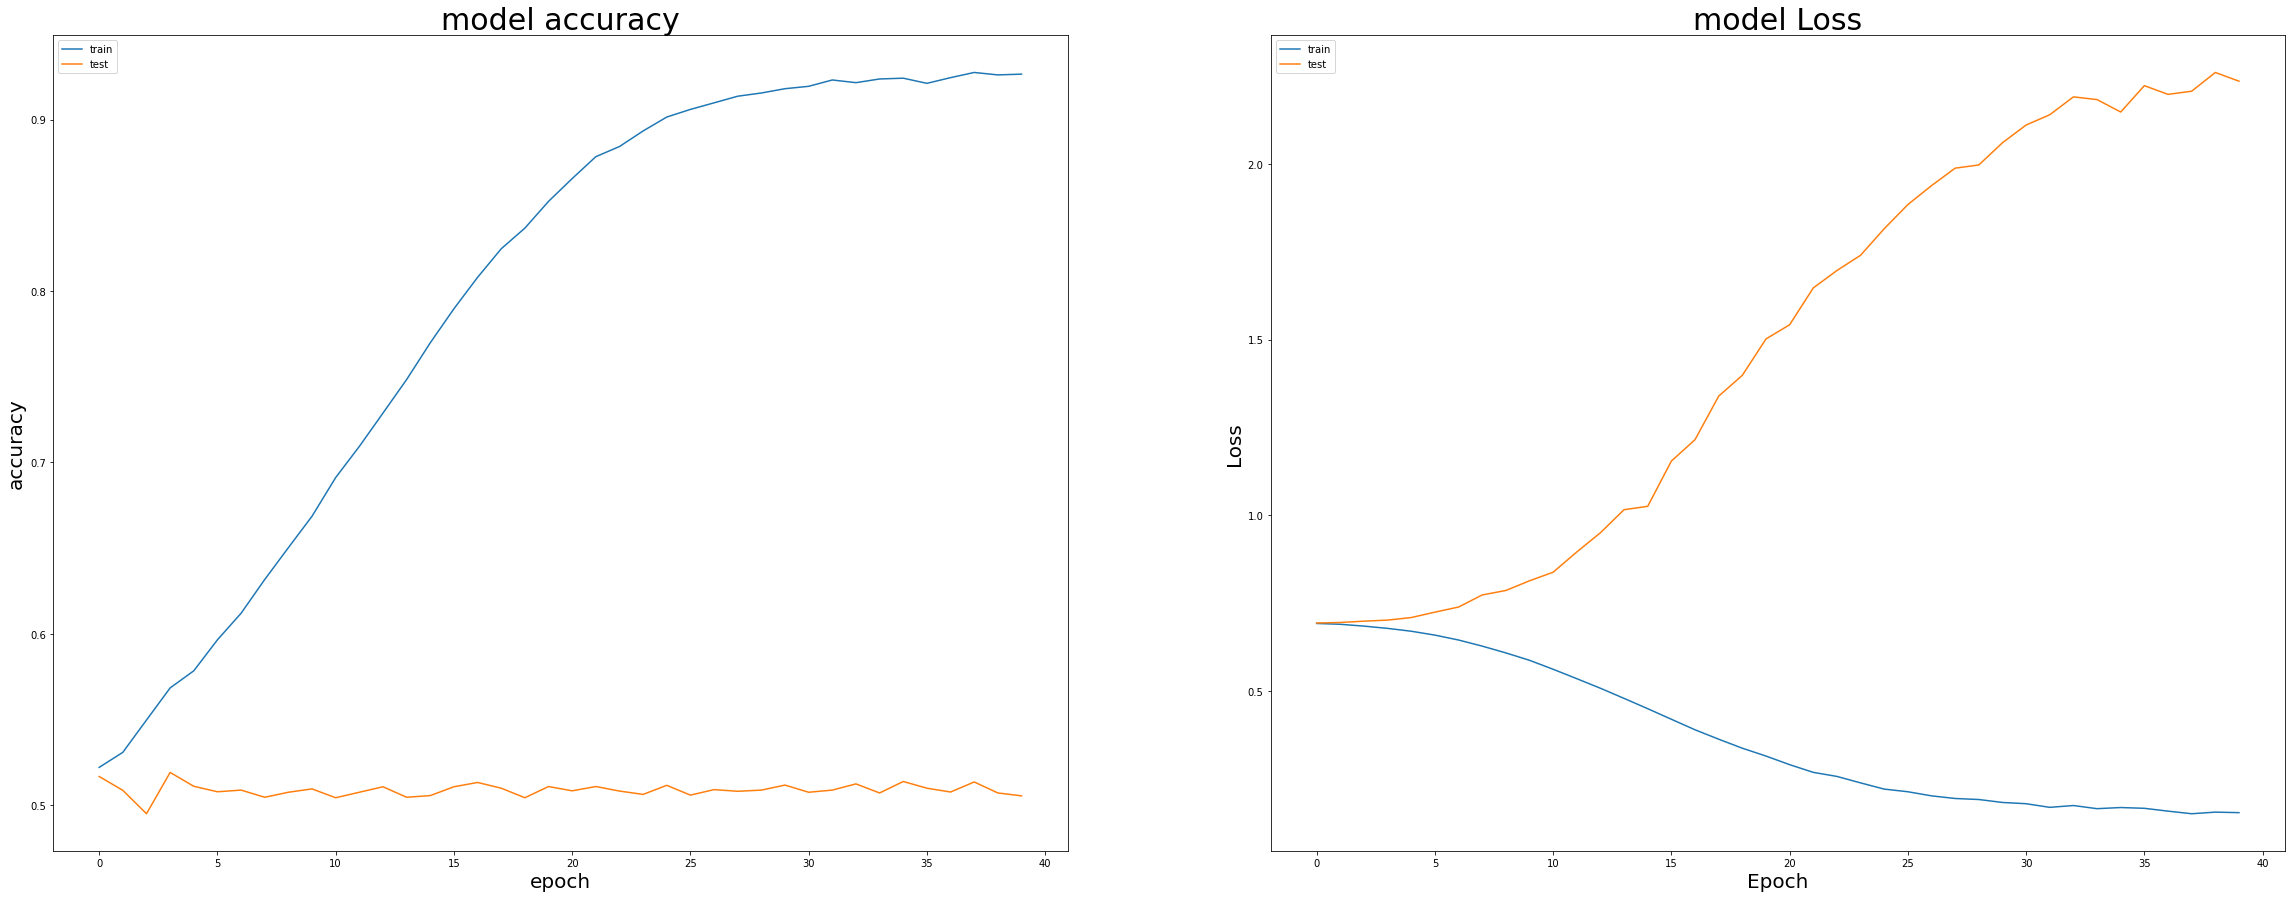

In [27]:
grapPlotter.plot_train_history(embdoc_embLSTM_hist)

In [28]:
#save mean metrics
save_metrics(sim_metrics, embdoc_embLSTM_hist, 'embdoc_embLSTM')

##### Simple Dense

In [29]:


embdoc_simple_dense = SimpleDense(20).get_model()
embdoc_simple_dense_hist = embdoc_simple_dense.fit(X_emb_doc_train, y_emb_doc_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40


898/898 [==============================] - 4s 3ms/step - loss: 0.8210 - accuracy: 0.5049 - val_loss: 0.6953 - val_accuracy: 0.4826
Epoch 2/40
898/898 [==============================] - 2s 3ms/step - loss: 0.6938 - accuracy: 0.5197 - val_loss: 0.6925 - val_accuracy: 0.5253
Epoch 3/40
898/898 [==============================] - 3s 3ms/step - loss: 0.6924 - accuracy: 0.5240 - val_loss: 0.6926 - val_accuracy: 0.5285
Epoch 4/40
898/898 [==============================] - 2s 3ms/step - loss: 0.6923 - accuracy: 0.5246 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 5/40
898/898 [==============================] - 2s 3ms/step - loss: 0.6921 - accuracy: 0.5246 - val_loss: 0.6917 - val_accuracy: 0.5287
Epoch 6/40
898/898 [==============================] - 2s 3ms/step - loss: 0.6923 - accuracy: 0.5246 - val_loss: 0.6917 - val_accuracy: 0.5283
Epoch 7/40
898/898 [==============================] - 2s 2ms/step - loss: 0.6929 - accuracy: 0.5246 - val_loss: 0.6930 - val_accuracy: 0.5277
Epoch 8/40
898/89

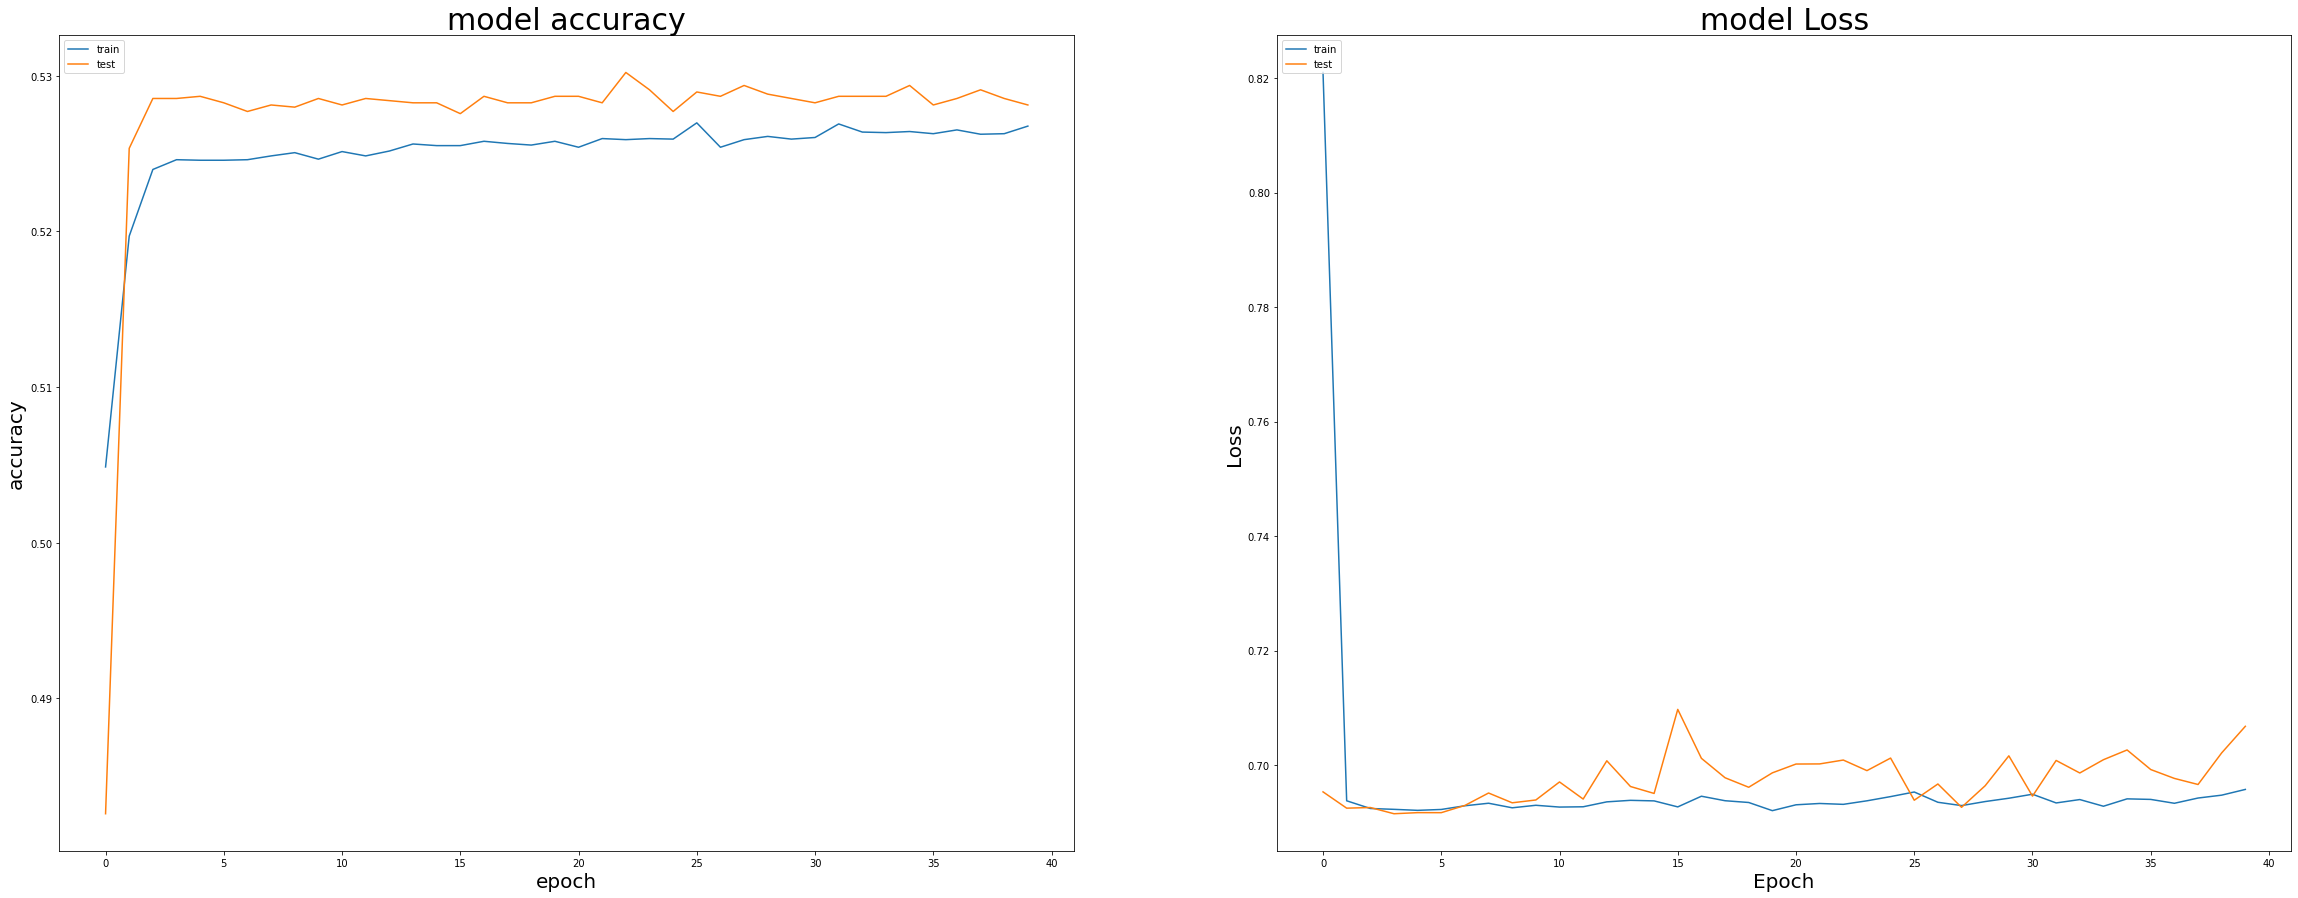

In [30]:
grapPlotter.plot_train_history(embdoc_simple_dense_hist)



In [31]:
#save mean metrics
save_metrics(sim_metrics, embdoc_simple_dense_hist,  'embedding_model_embdoc_simple_dense')


#### TCN

In [32]:
#instantiate, setup and get TCN model
emb_doc_tcn = TCNModel(input_dim= vocab_size)
emb_doc_tcn.build_pretrained_embedding_matrix(google_news_word2vec, word_idxs, gooogle_w2v_emb_mean, gooogle_w2v_emb_std)


In [33]:
emb_doc_tcn_model = emb_doc_tcn.get_model()

In [34]:
emb_doc_tcn_model_train_hist = emb_doc_tcn_model.fit(X_emb_doc_train, y_emb_doc_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40


898/898 [==============================] - 62s 65ms/step - loss: 0.6943 - accuracy: 0.5233 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 2/40
898/898 [==============================] - 60s 67ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 3/40
898/898 [==============================] - 59s 66ms/step - loss: 0.6919 - accuracy: 0.5247 - val_loss: 0.6917 - val_accuracy: 0.5285
Epoch 4/40
898/898 [==============================] - 60s 67ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 5/40
898/898 [==============================] - 57s 64ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 6/40
898/898 [==============================] - 58s 65ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 7/40
898/898 [==============================] - 60s 67ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accuracy: 0.5285
Epo

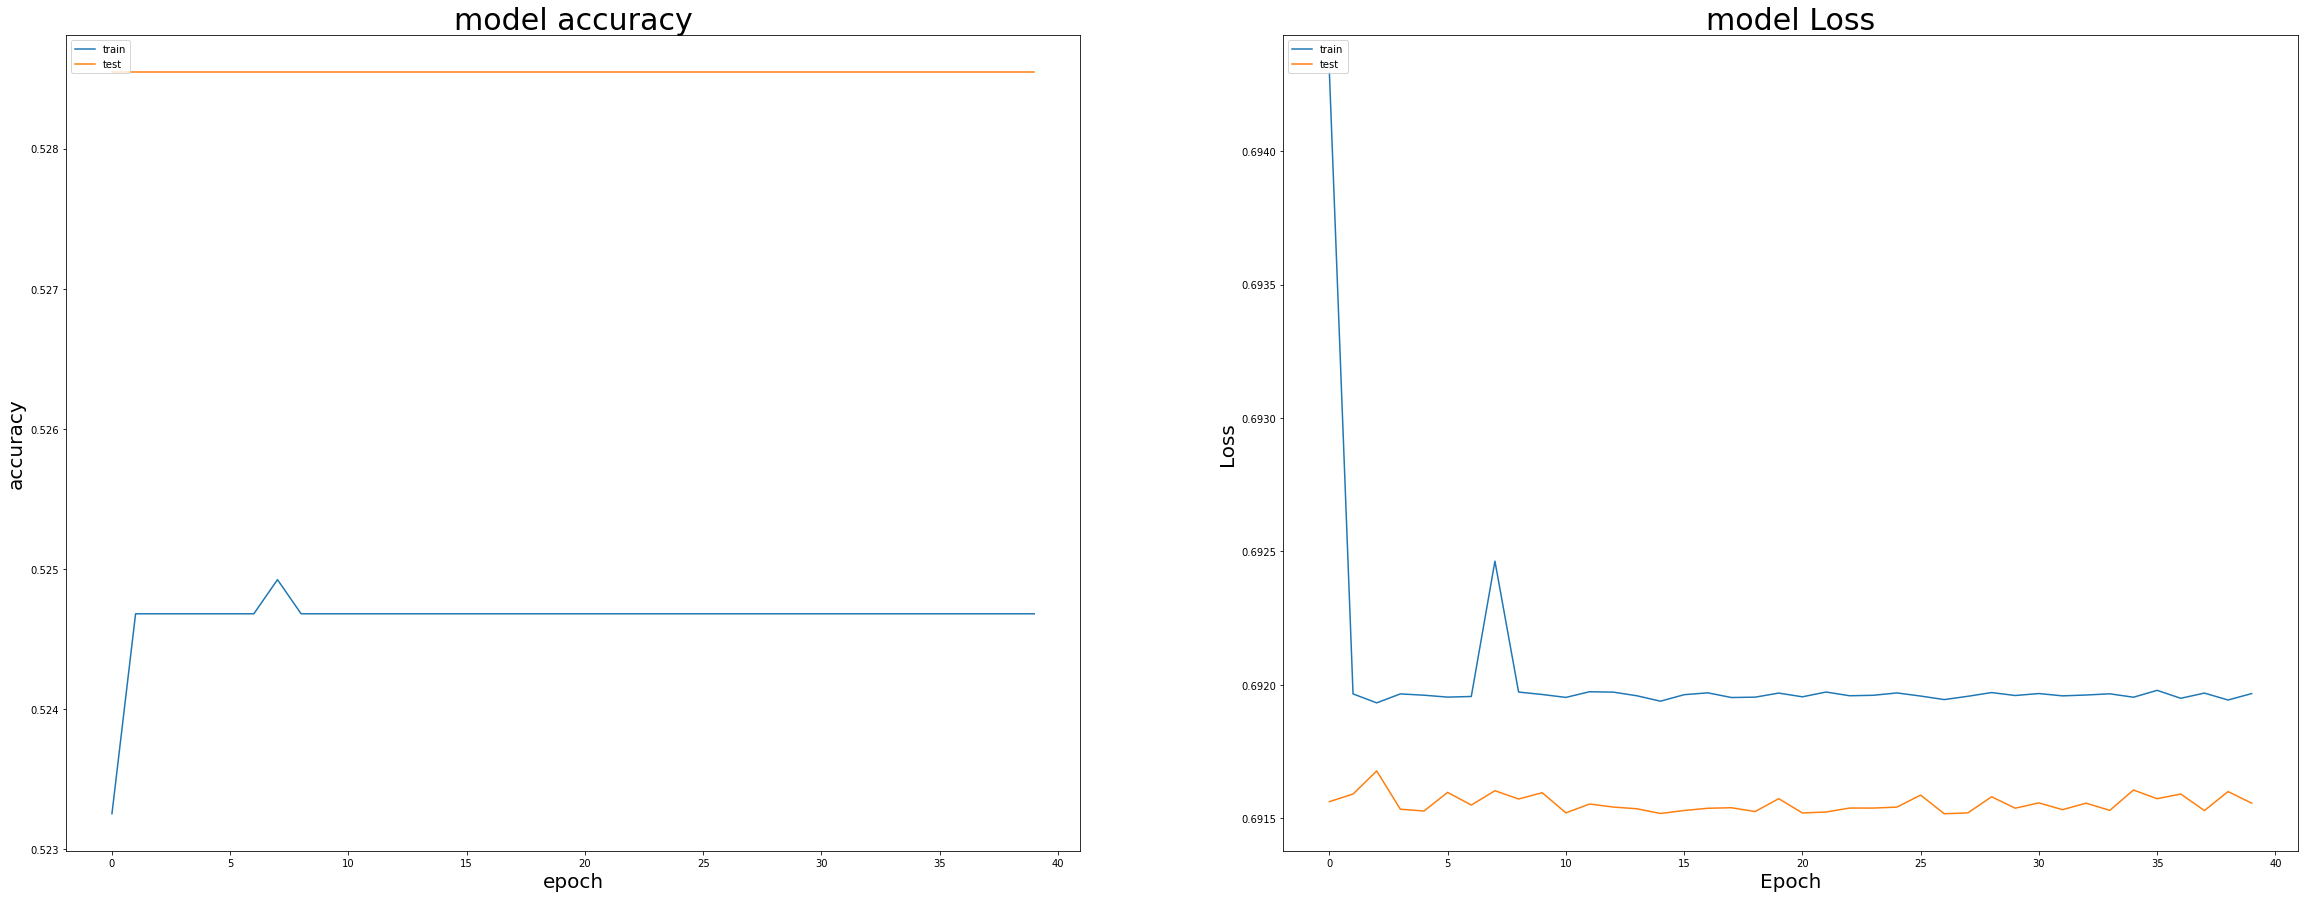

In [35]:
grapPlotter.plot_train_history(emb_doc_tcn_model_train_hist)

In [36]:
#save mean metrics
save_metrics(sim_metrics, emb_doc_tcn_model_train_hist,  'emb_doc_tcn')

##### CNN1D

In [37]:
#instantiate, setup and get CNN1D model 
emb_doc_cnn1d = CNN1D(input_dim= vocab_size, max_length= SENT_LENGTH)
emb_doc_cnn1d.build_pretrained_embedding_matrix(google_news_word2vec, word_idxs, gooogle_w2v_emb_mean, gooogle_w2v_emb_std)
emb_doc_cnn1d_model = emb_doc_cnn1d.get_model()

(115311, 300)


In [38]:
emb_doc_cnn1d_model_train_hist = emb_doc_cnn1d_model.fit(X_emb_doc_train, y_emb_doc_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40


898/898 [==============================] - 11s 12ms/step - loss: 0.6928 - accuracy: 0.5221 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 2/40
898/898 [==============================] - 12s 13ms/step - loss: 0.6921 - accuracy: 0.5247 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 3/40
898/898 [==============================] - 11s 12ms/step - loss: 0.6920 - accuracy: 0.5246 - val_loss: 0.6917 - val_accuracy: 0.5285
Epoch 4/40
898/898 [==============================] - 11s 12ms/step - loss: 0.6920 - accuracy: 0.5243 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 5/40
898/898 [==============================] - 10s 11ms/step - loss: 0.6920 - accuracy: 0.5244 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 6/40
898/898 [==============================] - 11s 12ms/step - loss: 0.6920 - accuracy: 0.5231 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 7/40
898/898 [==============================] - 11s 13ms/step - loss: 0.6919 - accuracy: 0.5239 - val_loss: 0.6915 - val_accuracy: 0.5285
Epo

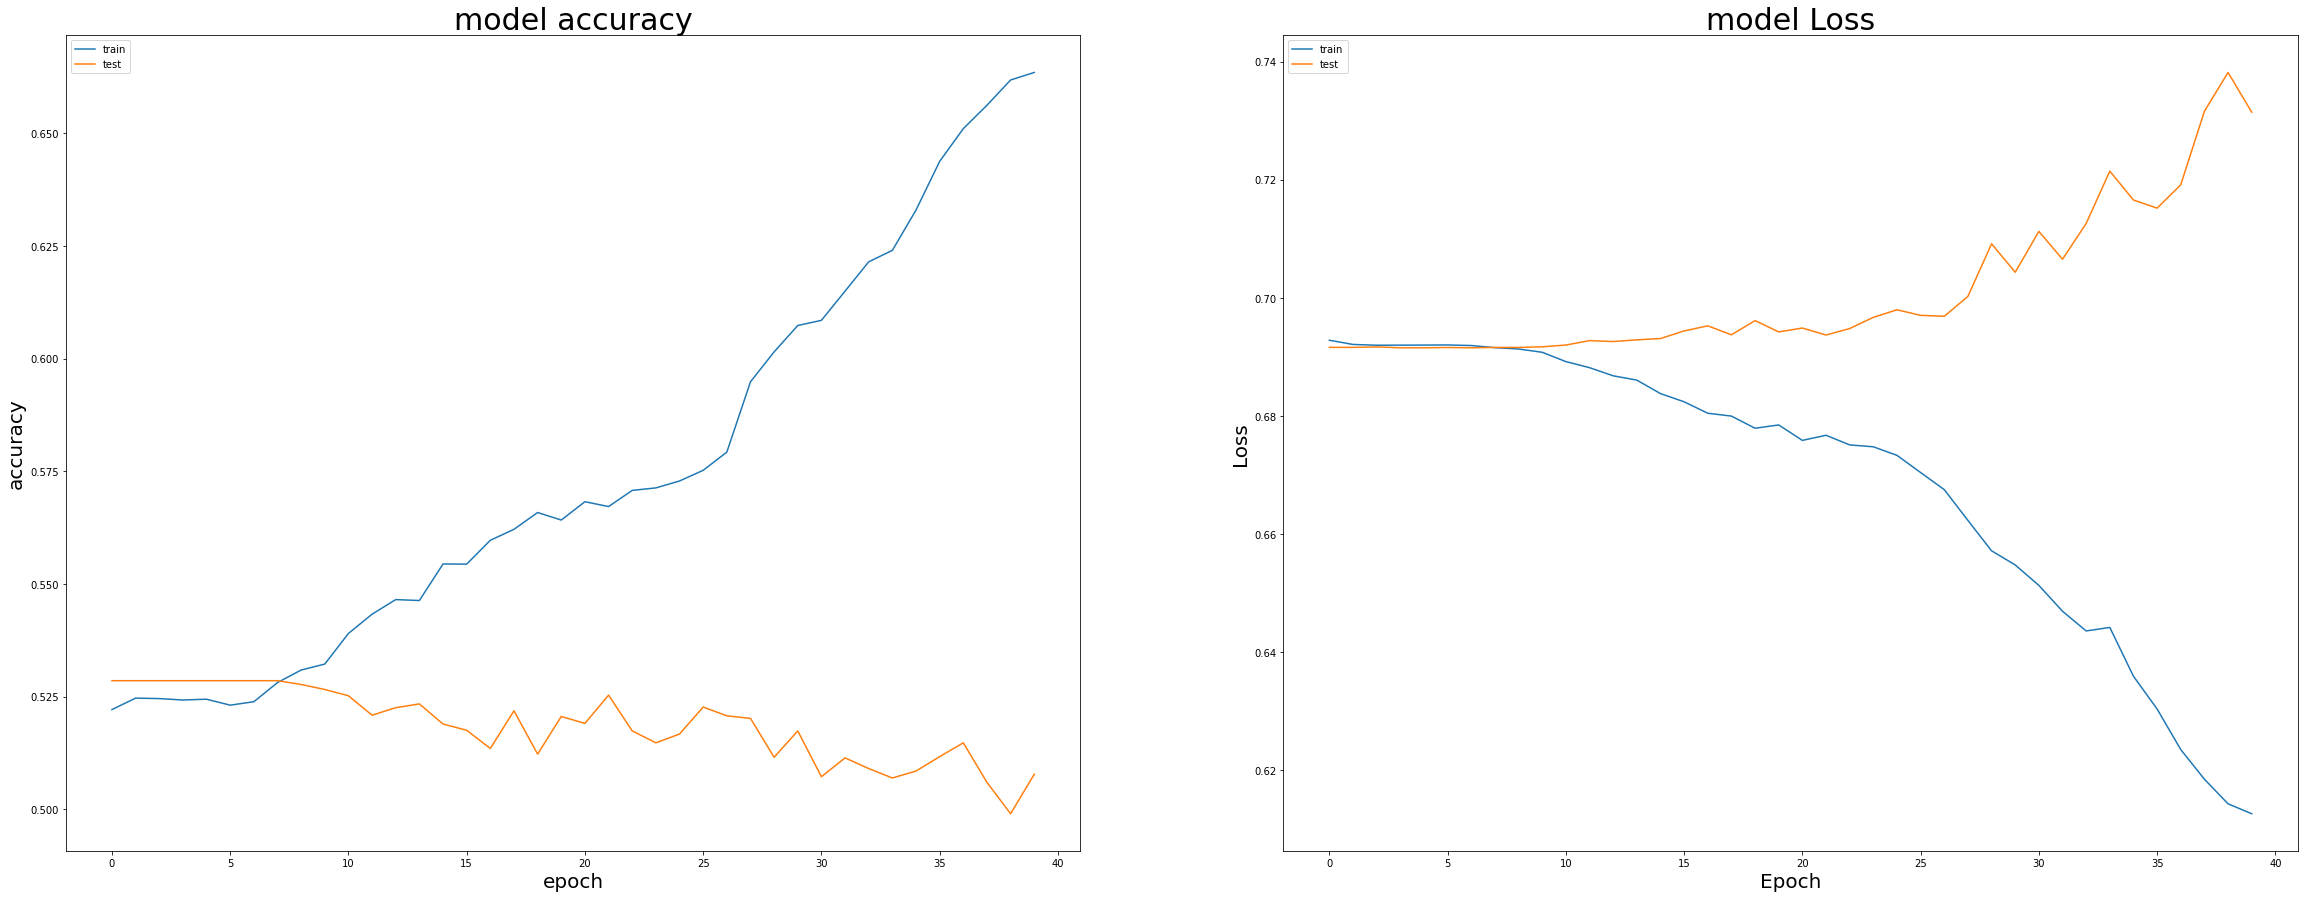

In [39]:
grapPlotter.plot_train_history(emb_doc_cnn1d_model_train_hist)

In [40]:
#save mean metrics
save_metrics(sim_metrics, emb_doc_cnn1d_model_train_hist,  'emb_doc_cnn1d')

##### CNNBiGRU

In [41]:
#instantiate, setup and get EnsembleCNNBiGRU modeel
embdoc_ensemblecnn = EnsembleCNNBiGRU(input_dim= vocab_size, max_length=SENT_LENGTH)
embdoc_ensemblecnn.build_pretrained_embedding_matrix(google_news_word2vec, word_idxs, gooogle_w2v_emb_mean, gooogle_w2v_emb_std)
embdoc_ensemblecnn = embdoc_ensemblecnn.get_model()

In [42]:
embdoc_ensemblecnn_hist = embdoc_ensemblecnn.fit(x=[X_emb_doc_train, X_emb_doc_train] ,y= y_emb_doc_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40


898/898 [==============================] - 49s 42ms/step - loss: 0.6931 - accuracy: 0.5203 - val_loss: 0.6920 - val_accuracy: 0.5290
Epoch 2/40
898/898 [==============================] - 34s 38ms/step - loss: 0.6914 - accuracy: 0.5246 - val_loss: 0.6927 - val_accuracy: 0.5281
Epoch 3/40
898/898 [==============================] - 34s 38ms/step - loss: 0.6897 - accuracy: 0.5354 - val_loss: 0.6980 - val_accuracy: 0.4879
Epoch 4/40
898/898 [==============================] - 34s 38ms/step - loss: 0.6874 - accuracy: 0.5471 - val_loss: 0.6955 - val_accuracy: 0.5092
Epoch 5/40
898/898 [==============================] - 34s 38ms/step - loss: 0.6831 - accuracy: 0.5631 - val_loss: 0.6982 - val_accuracy: 0.5177
Epoch 6/40
898/898 [==============================] - 34s 38ms/step - loss: 0.6773 - accuracy: 0.5778 - val_loss: 0.7032 - val_accuracy: 0.5077
Epoch 7/40
898/898 [==============================] - 33s 37ms/step - loss: 0.6682 - accuracy: 0.5964 - val_loss: 0.7091 - val_accuracy: 0.5029
Epo

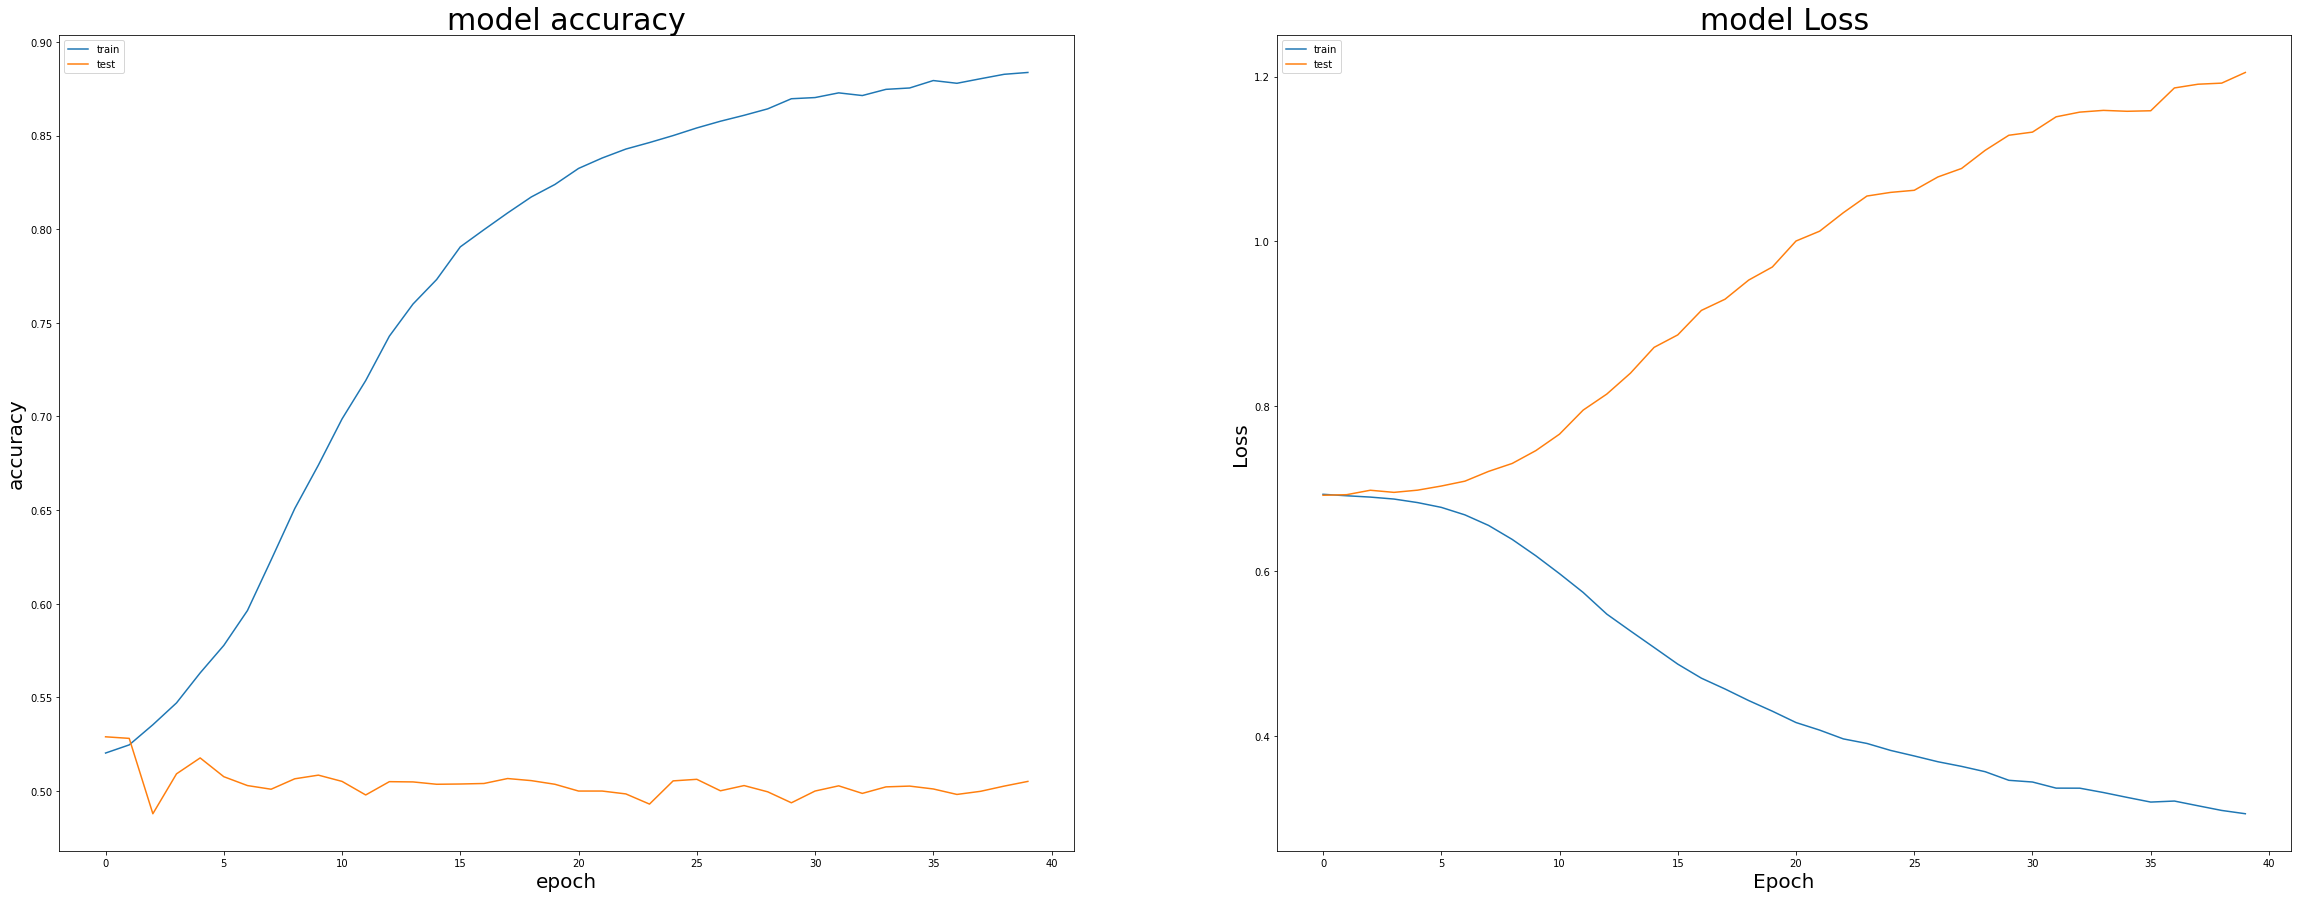

In [43]:
grapPlotter.plot_train_history(embdoc_ensemblecnn_hist)

In [44]:
#save mean metrics
save_metrics(sim_metrics, embdoc_ensemblecnn_hist,  'embdoc_ensemblecnn')

### Vectorizer codification

##### VEmbeddingLSTM

In [45]:

w2v_emb_lstm =  EmbeddingLSTM(vocab_params['news_vocab_size'], EMBEDDING__TITLE_SIZE, 100).get_model()
print(w2v_emb_lstm.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 50)         1346700   
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,407,201
Trainable params: 1,407,201
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
w2v_emb_lstm_hist = w2v_emb_lstm.fit(X_w2v_train, y_w2v_train, validation_split=0.2 ,epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 61s 64ms/step - loss: 0.6921 - accuracy: 0.5242 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 2/40
898/898 [==============================] - 59s 66ms/step - loss: 0.6921 - accuracy: 0.5245 - val_loss: 0.6917 - val_accuracy: 0.5285
Epoch 3/40
898/898 [==============================] - 57s 64ms/step - loss: 0.6919 - accuracy: 0.5243 - val_loss: 0.6923 - val_accuracy: 0.5242
Epoch 4/40
898/898 [==============================] - 56s 63ms/step - loss: 0.6920 - accuracy: 0.5249 - val_loss: 0.6918 - val_accuracy: 0.5283
Epoch 5/40
898/898 [==============================] - 57s 63ms/step - loss: 0.6920 - accuracy: 0.5245 - val_loss: 0.6917 - val_accuracy: 0.5283
Epoch 6/40
898/898 [==============================] - 57s 63ms/step - loss: 0.6919 - accuracy: 0.5257 - val_loss: 0.6922 - val_accuracy: 0.5242
Epoch 7/40
898/898 [==============================] - 56s 63ms/step - loss: 0.6919 - accuracy: 0.5249 - val_loss: 0.6918 - val_accuracy:

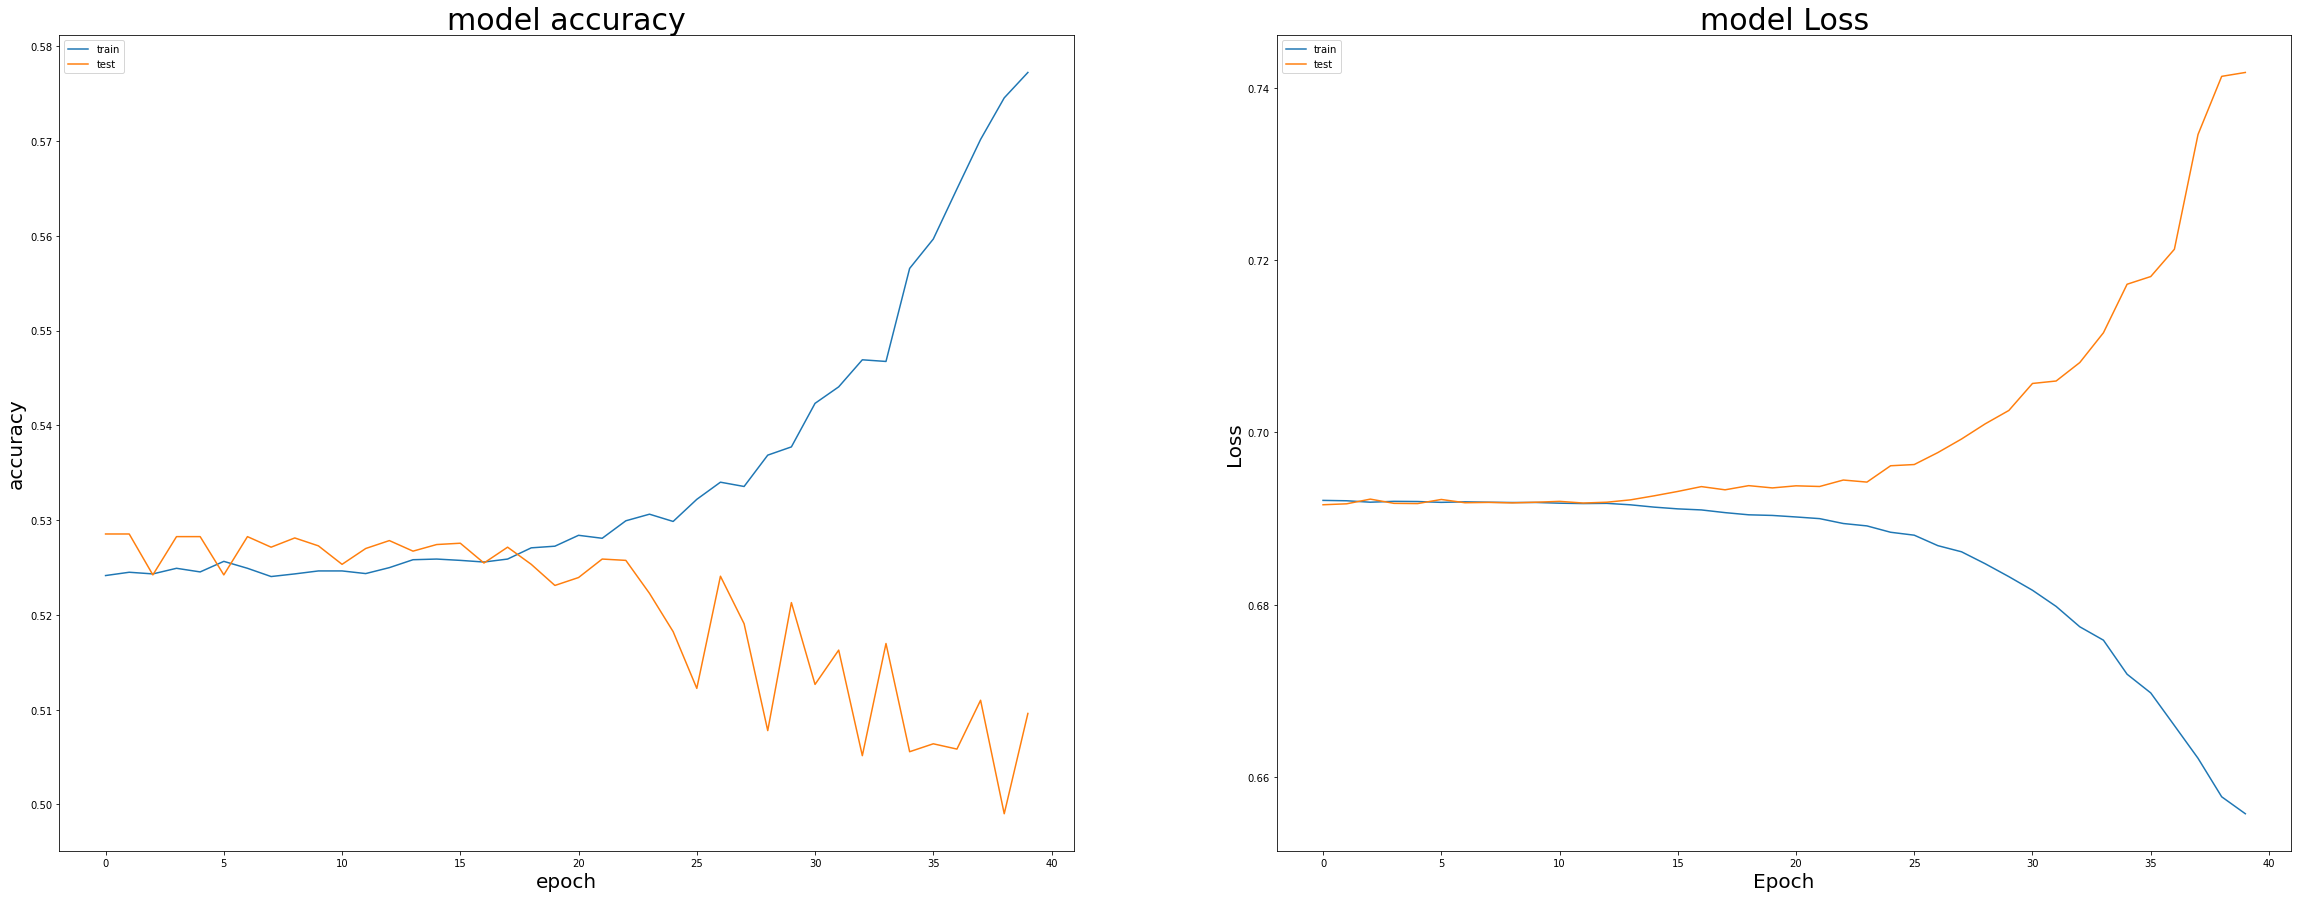

In [47]:
grapPlotter.plot_train_history(w2v_emb_lstm_hist)

In [48]:
#save mean metrics
save_metrics(sim_metrics, w2v_emb_lstm_hist,  'w2v_emb_lstm')

##### Simple Dense

In [49]:
w2v_simple_dense = SimpleDense(NEWS_VEC_DIM).get_model()

w2v_simple_dense_history = w2v_simple_dense.fit(X_w2v_train, y_w2v_train, validation_split=0.2 ,epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 4s 3ms/step - loss: 31.0262 - accuracy: 0.5173 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 2/40
898/898 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 3/40
898/898 [==============================] - 2s 3ms/step - loss: 0.6919 - accuracy: 0.5247 - val_loss: 0.6920 - val_accuracy: 0.5285
Epoch 4/40
898/898 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 5/40
898/898 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 6/40
898/898 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6917 - val_accuracy: 0.5285
Epoch 7/40
898/898 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch

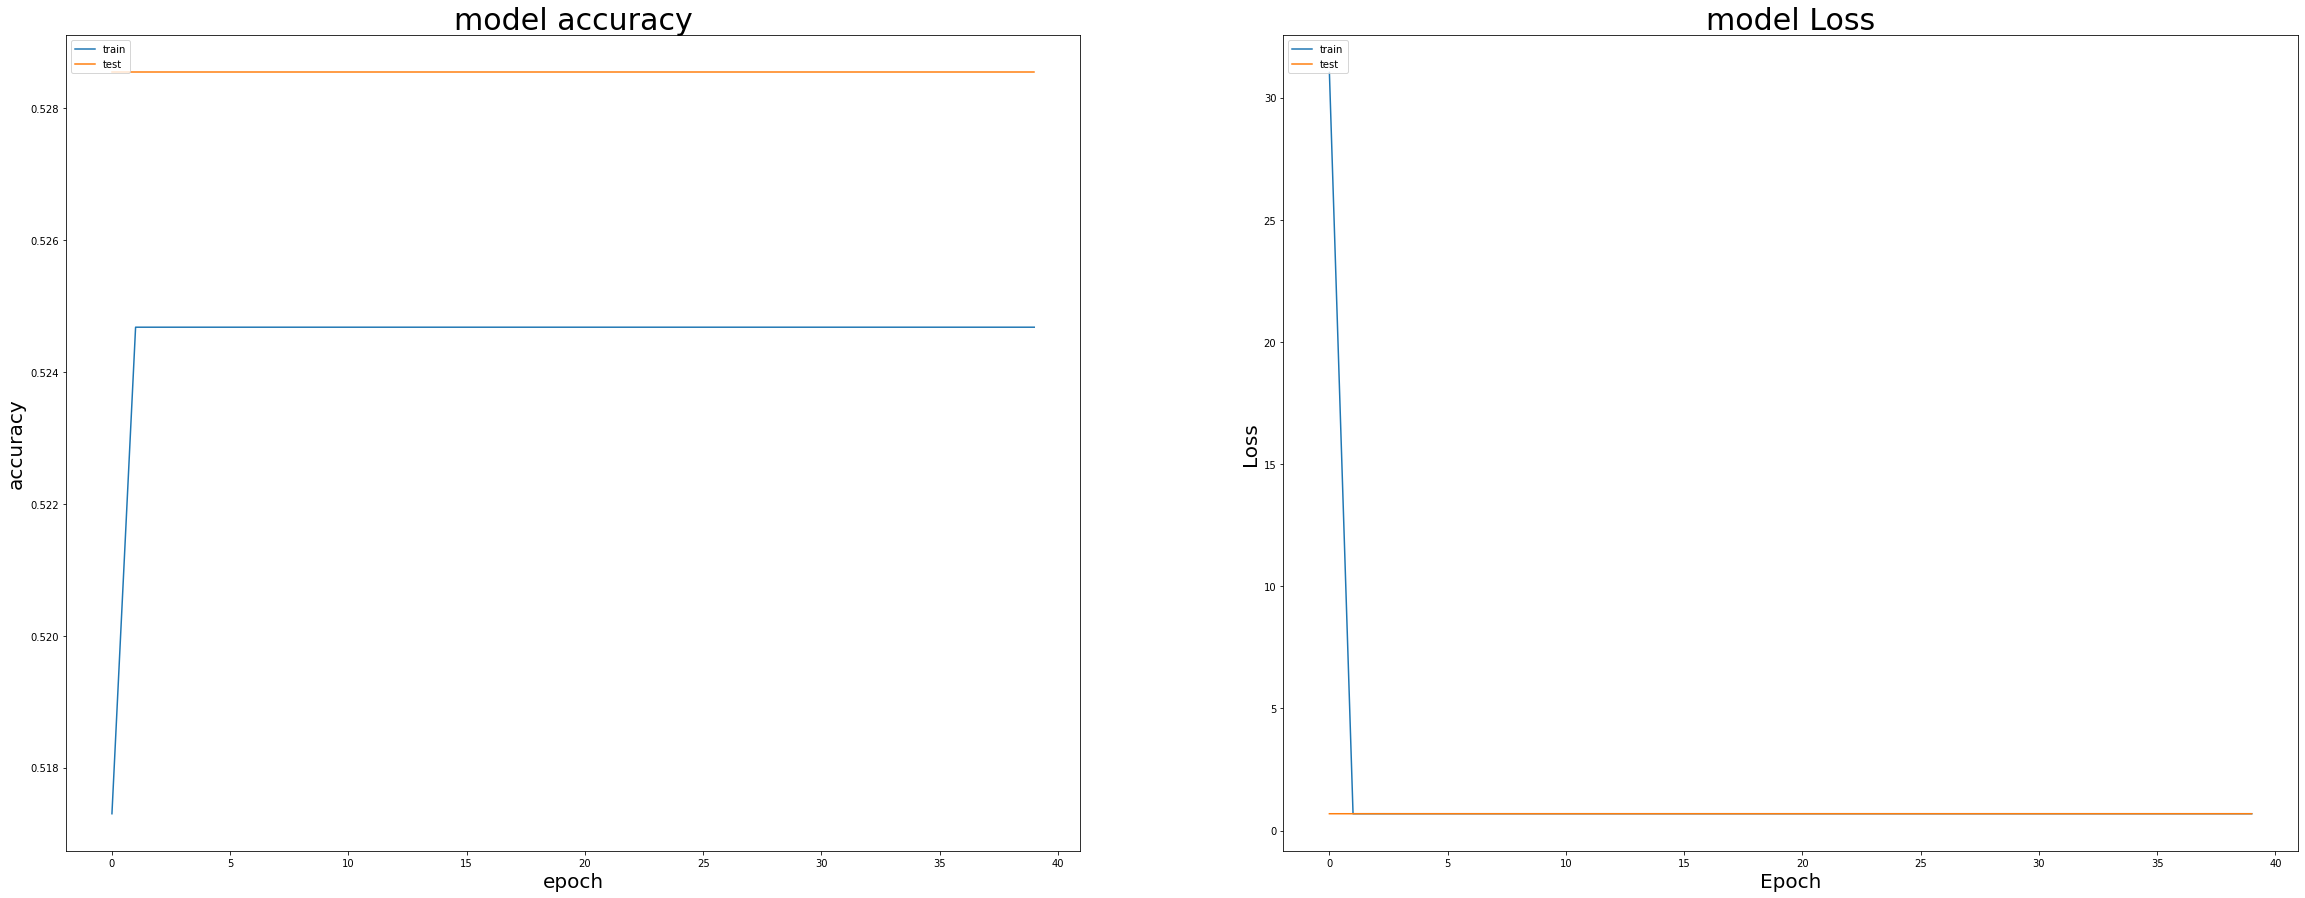

In [50]:
grapPlotter.plot_train_history(w2v_simple_dense_history)

In [51]:
#save mean metrics
save_metrics(sim_metrics, w2v_simple_dense_history,  'w2v_simple_dense')

#### TCN

In [52]:
#instantiate and configure TCN
w2v_tcn = TCNModel(input_dim= vocab_size)
w2v_tcn.build_pretrained_embedding_matrix(google_news_word2vec, word_idxs, gooogle_w2v_emb_mean, gooogle_w2v_emb_std)
w2v_tcn_model = w2v_tcn.get_model()

In [53]:
w2v_tcn_model_hist =w2v_tcn_model.fit(X_w2v_train, y_w2v_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40


898/898 [==============================] - 125s 135ms/step - loss: 0.6940 - accuracy: 0.5239 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 2/40
898/898 [==============================] - 120s 133ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 3/40
898/898 [==============================] - 121s 135ms/step - loss: 0.6919 - accuracy: 0.5247 - val_loss: 0.6917 - val_accuracy: 0.5285
Epoch 4/40
898/898 [==============================] - 120s 134ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 5/40
898/898 [==============================] - 120s 134ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 6/40
898/898 [==============================] - 119s 133ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 7/40
898/898 [==============================] - 119s 133ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accura

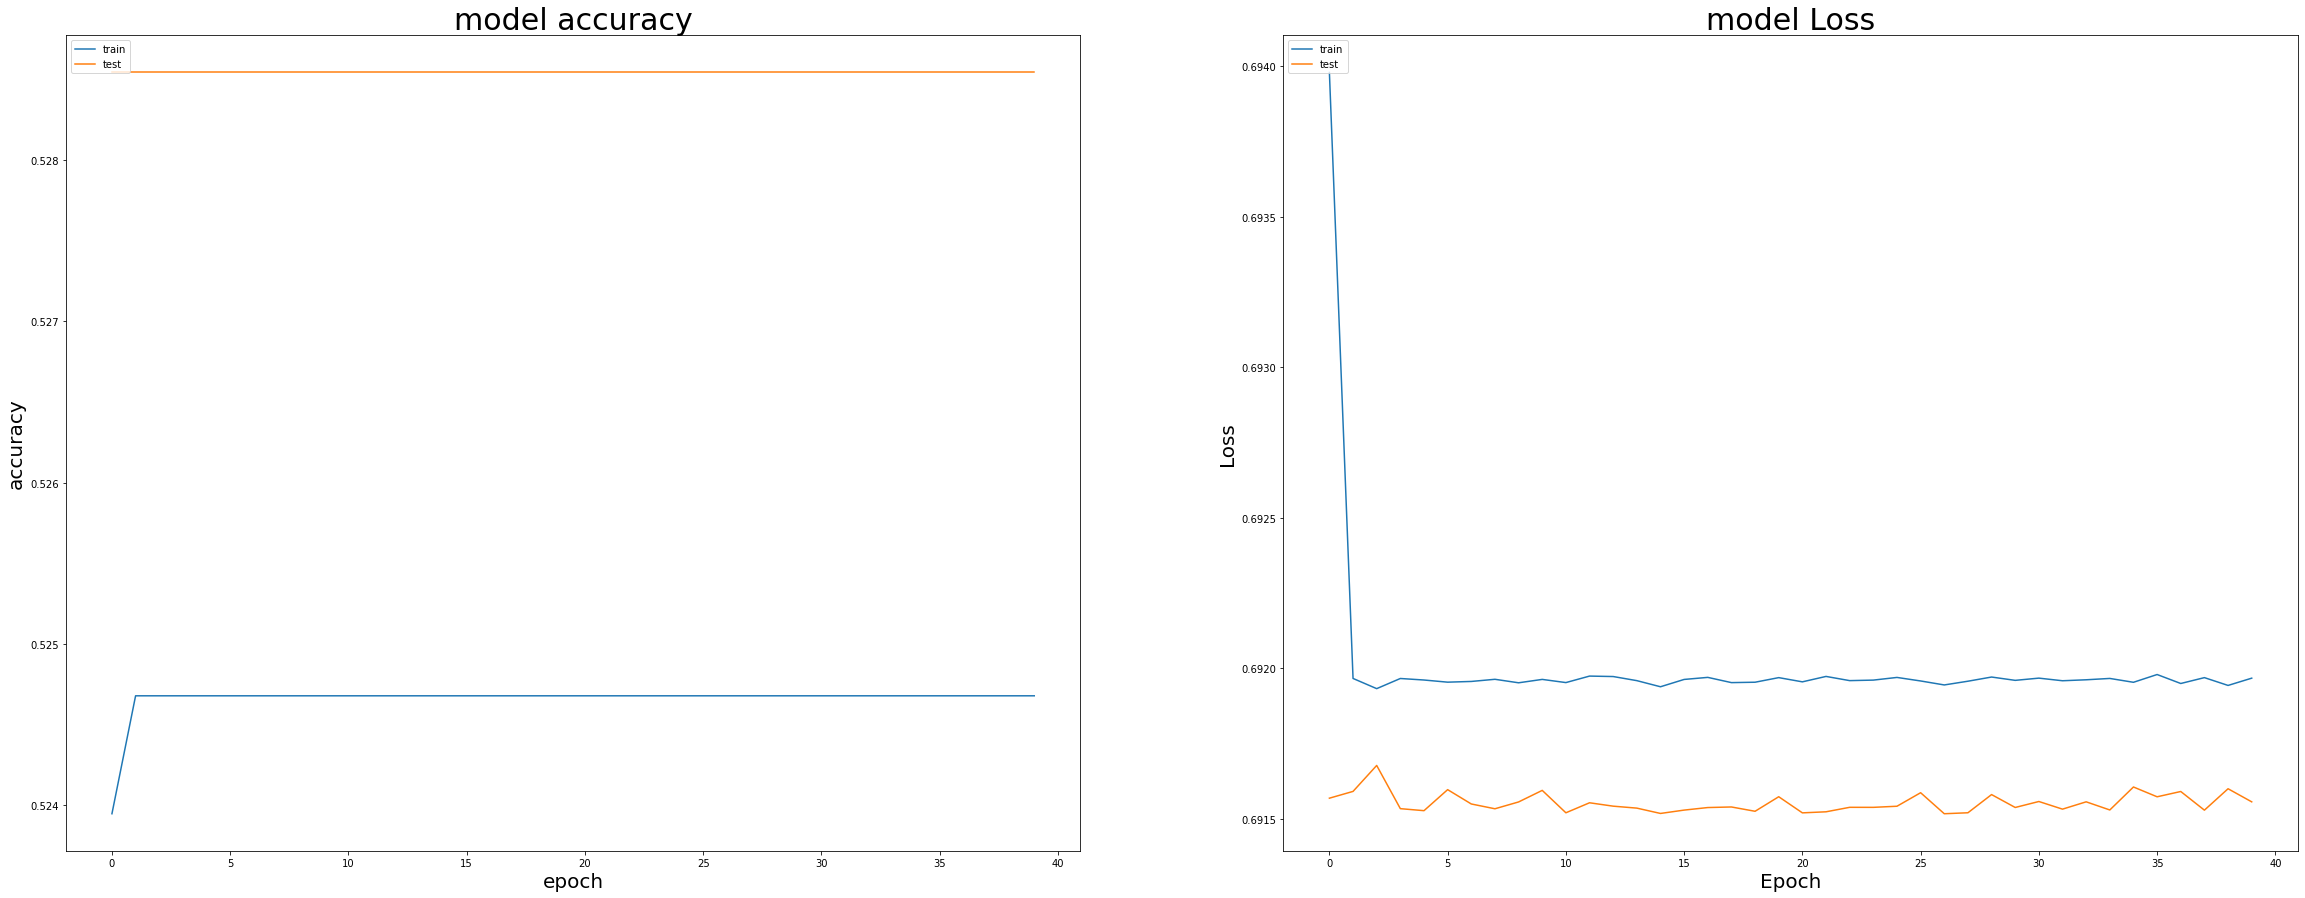

In [54]:
grapPlotter.plot_train_history(w2v_tcn_model_hist)

In [55]:
#save mean metrics
save_metrics(sim_metrics, w2v_tcn_model_hist,  'w2v_tcn')

##### CNN1D

In [56]:
#instantiate and configure CNN1D
w2v_cnn1d = CNN1D(input_dim= vocab_size, max_length= NEWS_VEC_DIM)
w2v_cnn1d.build_pretrained_embedding_matrix(google_news_word2vec, word_idxs, gooogle_w2v_emb_mean, gooogle_w2v_emb_std)
w2v_cnn1d = w2v_cnn1d.get_model()

(115311, 300)


In [57]:
w2v_cnn1d_hist =w2v_cnn1d.fit(X_w2v_train, y_w2v_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40


898/898 [==============================] - 35s 36ms/step - loss: 0.6925 - accuracy: 0.5225 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 2/40
898/898 [==============================] - 31s 35ms/step - loss: 0.6921 - accuracy: 0.5246 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 3/40
898/898 [==============================] - 31s 34ms/step - loss: 0.6919 - accuracy: 0.5250 - val_loss: 0.6917 - val_accuracy: 0.5285
Epoch 4/40
898/898 [==============================] - 29s 32ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 5/40
898/898 [==============================] - 30s 33ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 6/40
898/898 [==============================] - 37s 42ms/step - loss: 0.6920 - accuracy: 0.5246 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 7/40
898/898 [==============================] - 28s 32ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6915 - val_accuracy: 0.5285
Epo

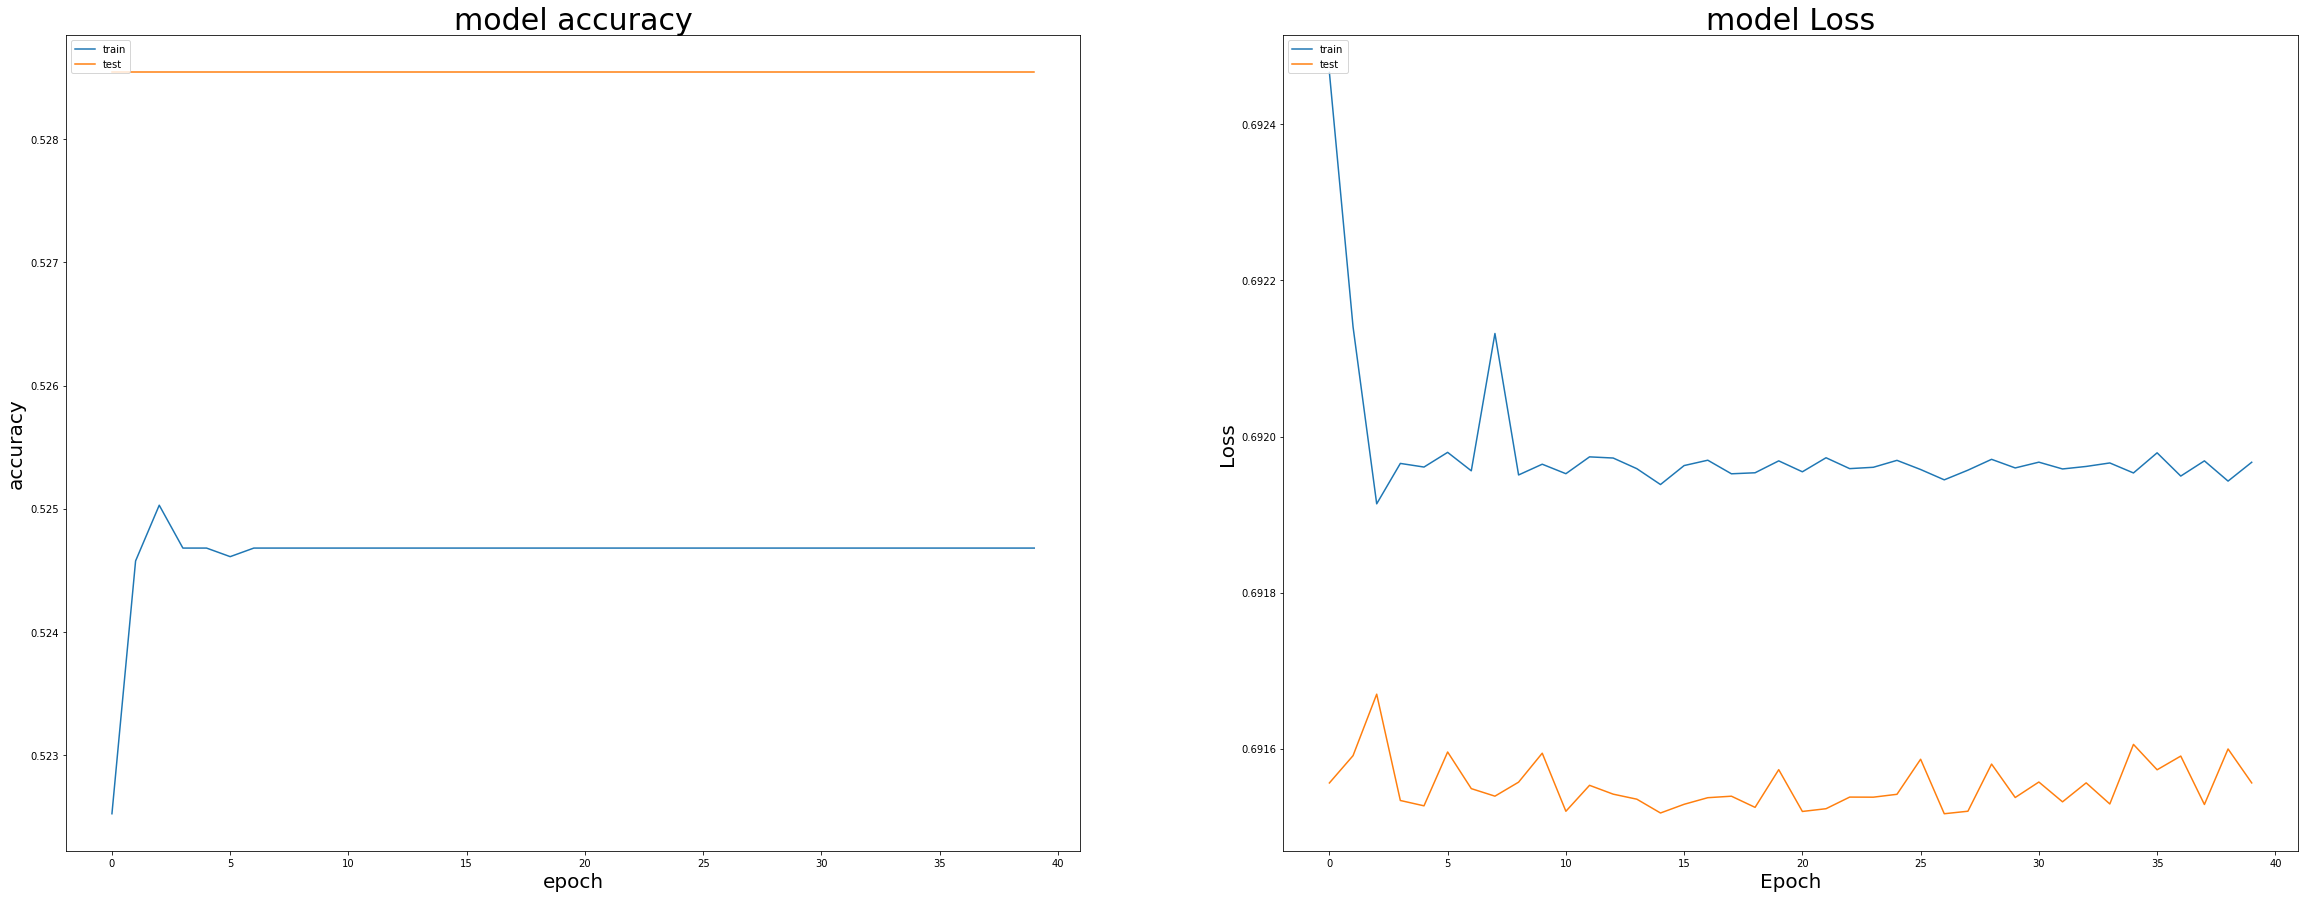

In [58]:
grapPlotter.plot_train_history(w2v_cnn1d_hist)

In [59]:
#save mean metrics
save_metrics(sim_metrics, w2v_cnn1d_hist,  'w2v_cnn1d')

##### EnsembleCNNBiGRU

In [60]:
#instantiate and configure EnsembleCNNBiGRU
w2v_ensemblecnn = EnsembleCNNBiGRU(input_dim= vocab_size, max_length=NEWS_VEC_DIM)
w2v_ensemblecnn.build_pretrained_embedding_matrix(google_news_word2vec, word_idxs, gooogle_w2v_emb_mean, gooogle_w2v_emb_std)
w2v_ensemblecnn = w2v_ensemblecnn.get_model()

In [61]:
#this model has 2 channels
w2v_ensemblecnn_hist =w2v_ensemblecnn.fit([X_w2v_train,X_w2v_train ], y_w2v_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 116s 114ms/step - loss: 0.6925 - accuracy: 0.5216 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 2/40
898/898 [==============================] - 96s 107ms/step - loss: 0.6920 - accuracy: 0.5247 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 3/40
898/898 [==============================] - 94s 104ms/step - loss: 0.6919 - accuracy: 0.5247 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 4/40
898/898 [==============================] - 96s 107ms/step - loss: 0.6920 - accuracy: 0.5246 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 5/40
898/898 [==============================] - 95s 105ms/step - loss: 0.6920 - accuracy: 0.5246 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 6/40
898/898 [==============================] - 96s 107ms/step - loss: 0.6920 - accuracy: 0.5245 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 7/40
898/898 [==============================] - 98s 109ms/step - loss: 0.6919 - accuracy: 0.5249 - val_loss: 0.6916 - val_a

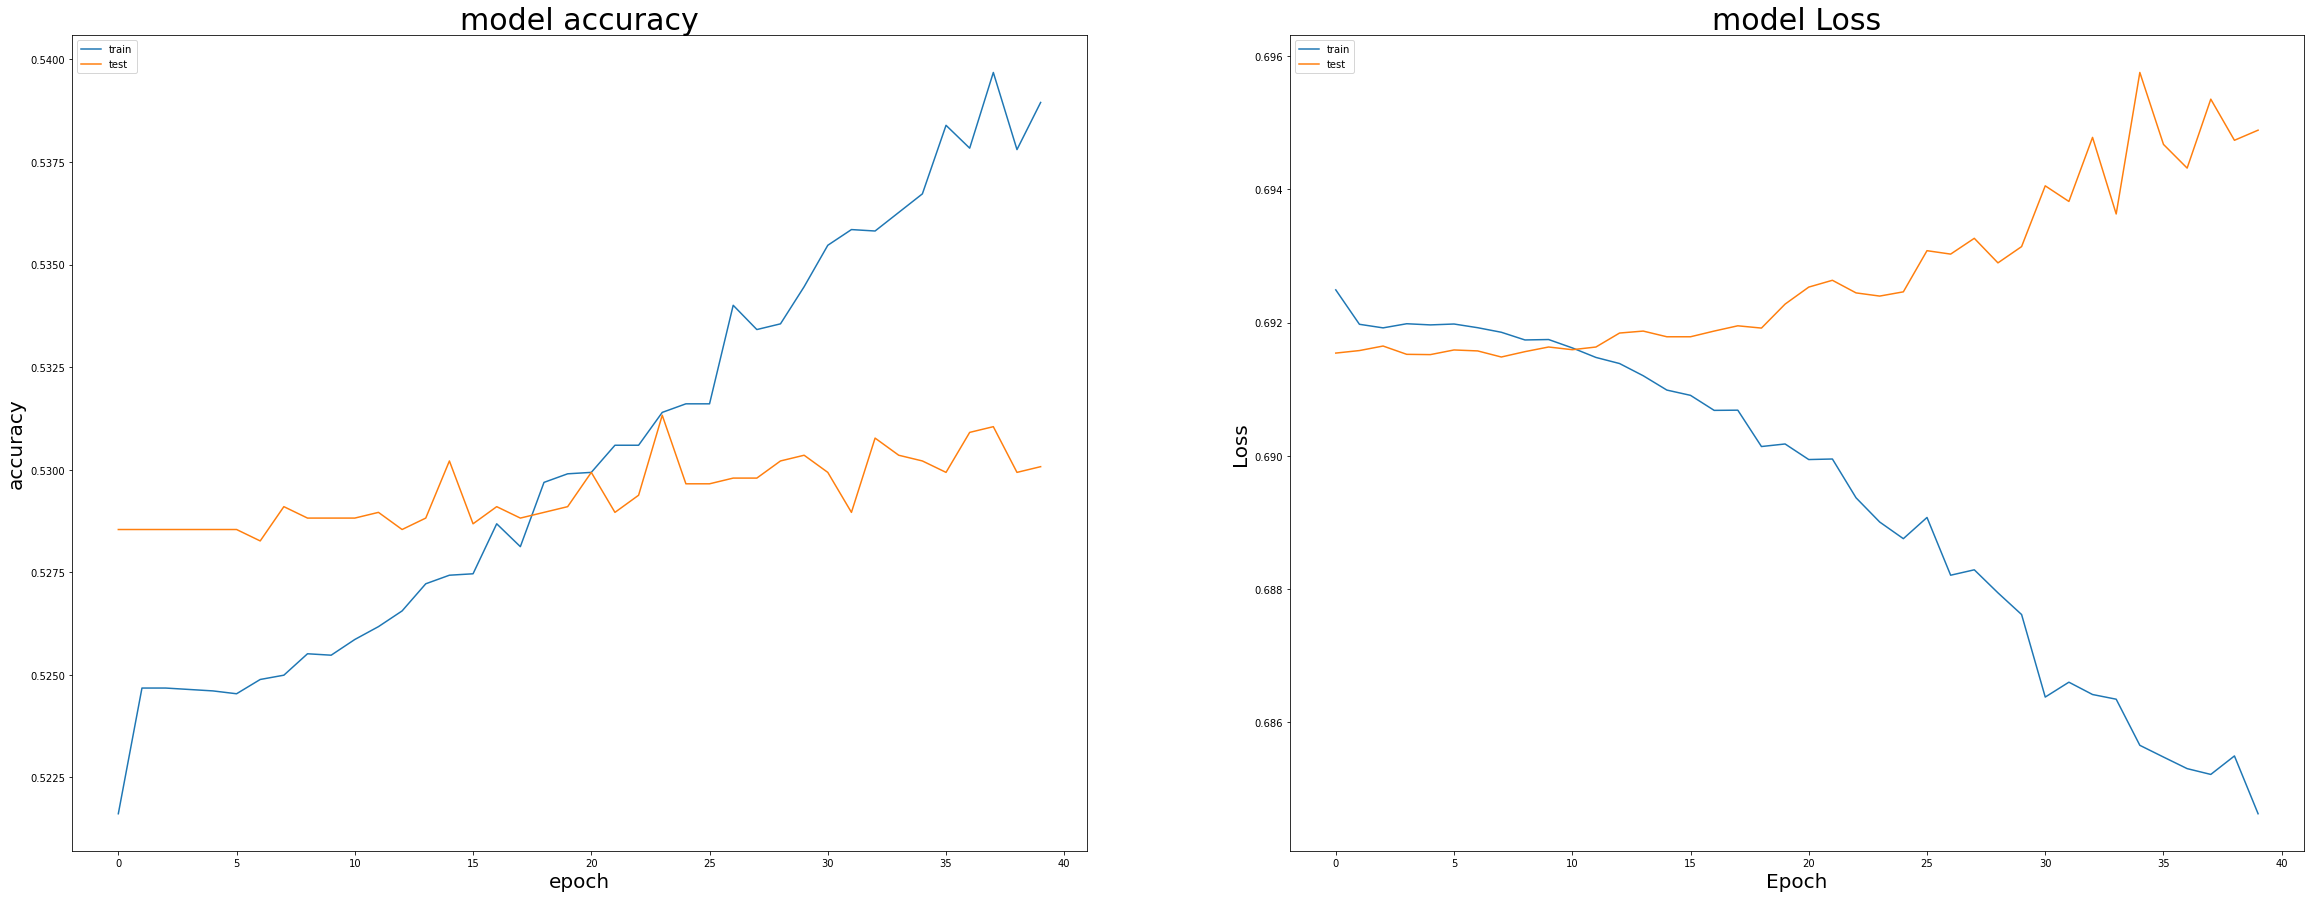

In [62]:
grapPlotter.plot_train_history(w2v_ensemblecnn_hist)

In [63]:
#save mean metrics
save_metrics(sim_metrics, w2v_ensemblecnn_hist,  'w2v_ensemblecnn')